# Frontend sharing - Oct 26th, 2018


## Topic: Machine Learning Fundamentals
------

### Outlines:

1. **What is Machine Learning**
2. **Terminologies**
3. **Machine Learning - Types of task**
    * Supervised Learning
    * Semi-supervised Learning
    * Active Learning
    * Unsupervised Learning
    * Reinforcement Learning
4. **Applications**
5. **Examples**
    * Linear Regression
    * Logistic Regression
    * Decision Tree
    * Support Vector Machines
    * K-Means
    * Somethings about Deep Learning
    * Toys about Reinforcement Learning: **Q-Learning** & **Alpha-Go Zero**
6. Bonus: **Dimensionality Reduction**
    * Singular Value Decomposition
    * Principle Component Analysis


---

### Part 1: What is Machine Learning?

* *Statistical techniques* for computer to **learn**
    
    * **learn**: progressively improve performance on a specific task
* Without explicity programmed
* **Data-driven!**

-----

### Part 2: Terminologies

* **training set, testing set, validation set**: set of data to **train, test, validate** algorithm/model.
* **labeled/unlabled data**: data which contain input but have/doesn't have corresponding output.
* **lost/cost function**: a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event.
* **epoch**: number of completion pass through the whole training set
* **learning rate**: a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. `new_weight = existing_weight — learning_rate * gradient`
![](images/0_00BrbBeDrFOjocpK_.png)
![](images/0_uIa_Dz3czXO5iWyI_.png)
* **overfitting**: the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably
-----

### Part 3: Machine Learning - Types of task

1. **Supervised Learning**
    * Input and output are **both** provided.
    * *Goal*: Learn **a general rule** to **map** input to output.
    * Very sensitive with noise!    
2. **Semi-supervised Learning**
    * Input and output are **both** provided, but input is an **incomplete training signal**:
        * **Incomplete training signal**: a training set with some (*but often many!*) of target outputs missing.
    * *Goal*: Learn **a general rule** to **map** input to **existing** output.
3. **Active Learning**
    * Input and output are **both** provided, but input is an **incomplete training signal**.
    * Learning algorithms can actively query the user/teacher for labels of *incomplete training signal*
4. **Unsupervised Learning**
    * Unlabled data is given, leaving it on its own to find structure of its input.
    * *Goal*: Discovering hidden patterns in data or *feature learning*. 
5. **Reinforcement Learning**
    * Data contains **rewards and punishments**
    * Important terms.: Environment, Agent, Action and Reward.
    * Data are given only as feedback!
    ![Typical framing of RL](images/Reinforcement_learning_diagram.png)
    
-----

### Part 4: Machine Learning - Application

1. **Classification**: inputs are divided into two or more classes, and the learner must produce a model that assigns unseen inputs to one or more (multi-label classification) of these classes. **Typically tackled in a supervised way**.
![Classification](images/512px-Kernel_Machine.svg.png)
2. **Regression**: Supervised. Modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables.
![LinearRegression](images/Linear_regression.png)
3. **Clustering**: a set of inputs is to be divided into groups. Unlike in classification, the groups are not known beforehand. Typically an unsupervised task.
![](images/601px-Cluster-2.svg.png)
4. **Density**: Estimation finds the distribution of inputs in some space.
![](images/unnamed-chunk-4-1.png)
5. **Dimensionality reduction**: Simplifies inputs by mapping them into a lower-dimensional space.
![](images/Dimensionality_Reduction_1.jpg)
-----

### Part 5: Machine Learning - Examples

* Linear Regression
* Logistic Regression
* Decision Tree
* Support Vector Machines
* K-Means
* Somethings about Deep Learning
* Toys about Reinforcement Learning: **Q-Learning** & **Alpha-Go Zero**

    
-----

##### 5.1. Linear Regression

* Approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).


In [21]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

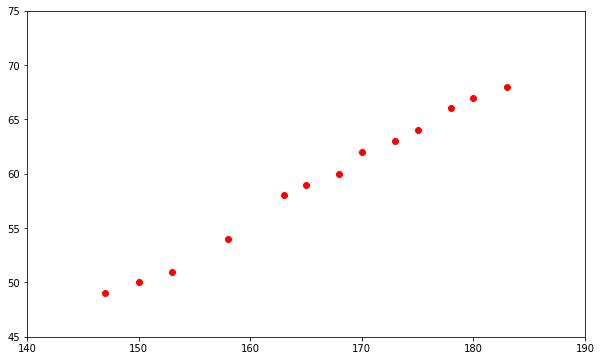

In [40]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

plt.axis([140, 190, 45, 75])
plt.plot(X, y, 'ro')

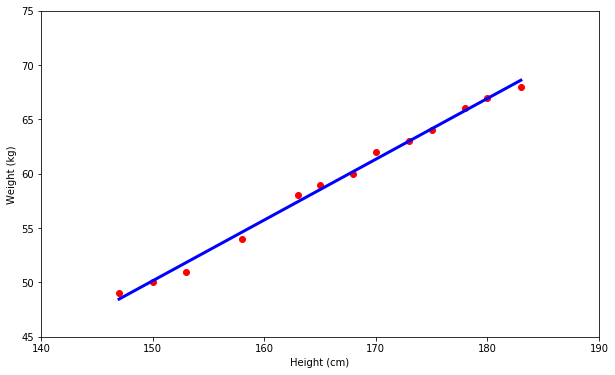

In [37]:
from sklearn.linear_model import LinearRegression

# implementation
model = LinearRegression(fit_intercept=False)
model.fit(Xbar, y)
y_pred = model.predict(Xbar)

# Visualize data 
plt.plot(X.T, y.T, 'ro')
plt.plot(X, y_pred, 'blue', linewidth=3)
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Logistic Regression

* Like linear, but use **logistic** function!
    * **logistic function** has curve is a common *S* shape.
* Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

![](images/600px-Logistic-curve.svg.png)

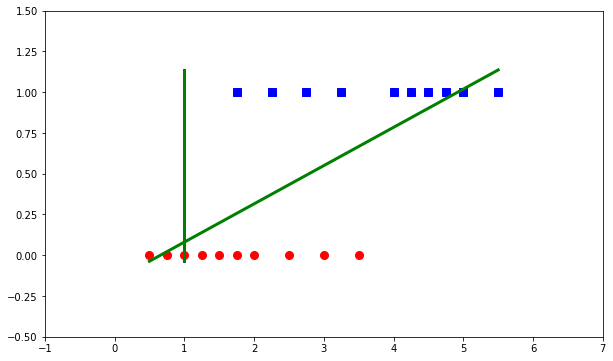

In [87]:
from sklearn.linear_model import LinearRegression

# Initialization

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.axis([-1, 7, -0.5, 1.5])
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

X = X.T
y = y.T
# implementation
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
model = LinearRegression(fit_intercept=False)
model.fit(Xbar, y)
y_pred = model.predict(Xbar)

# Visualize data 
plt.plot(X, y_pred, 'green', linewidth=3)
plt.show()

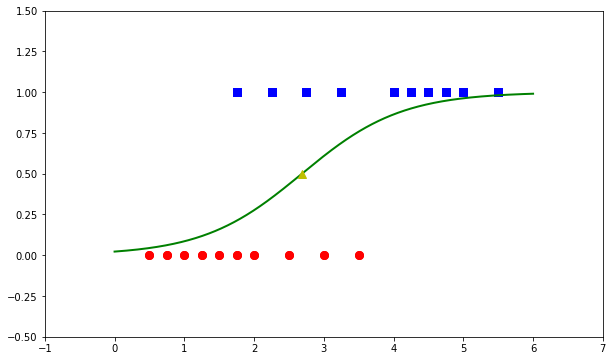

In [88]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.axis([-1, 7, -0.5, 1.5])
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, lrate, tol = 1e-4, n_epochs = 1000000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    epoch = 0
    epoch_for_validation = 20
    while epoch < n_epochs:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + lrate*(yi - zi)*xi
            epoch += 1
            # stopping criteria
            if epoch % epoch_for_validation == 0:                
                if np.linalg.norm(w_new - w[-epoch_for_validation]) < tol:
                    return w
            w.append(w_new)
    return w

lrate = 0.001
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, lrate)
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-1, 7, -0.5, 1.5])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.show()

#### Decision Tree

* A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. 

* Display an algorithm that only contains conditional control statements.

* Commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

![](images/0_Yclq0kqMAwCQcIV_.jpg)

![](images/dt_ex2.png)

**Example with ID3 - Iterative Dichotomiser 3, on Zoo data**. 

* Reference:  https://machinelearningcoban.com/2018/01/14/id3/

* Ideas: From **Entropy Function** and **Information Gain** of each step, choose the node having highest IG value to classify next step.

Link dataset: http://archive.ics.uci.edu/ml/datasets/zoo

#### Support Vector Machine

* Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier

![](images/svm3.png)

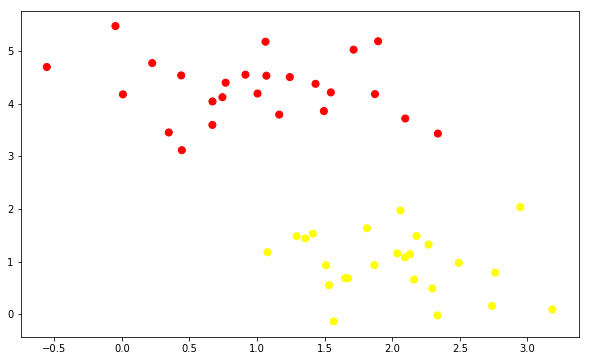

In [107]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

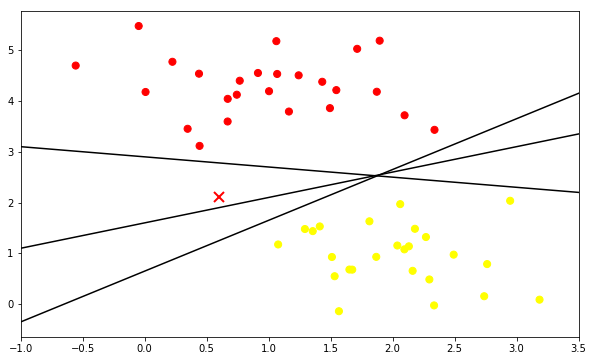

In [108]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

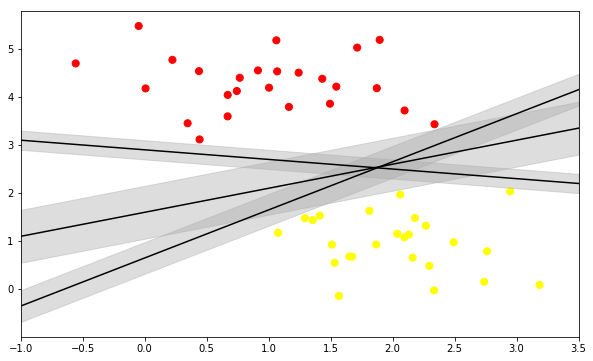

In [109]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

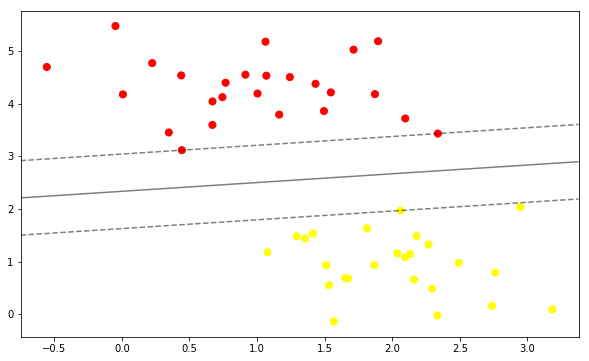

In [113]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [119]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 100, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200), value=10), Output()), _dom_classes…

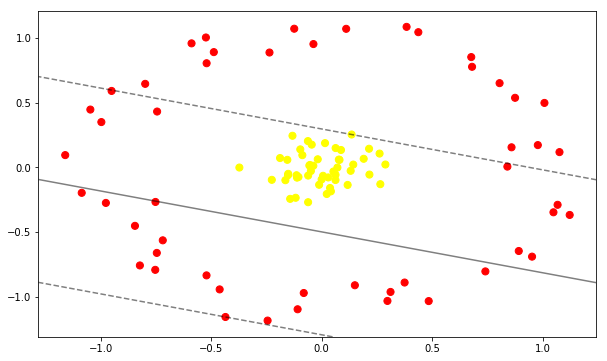

In [114]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

#### K-Means

1. *k* initial "means" are randomly generated from data
![](images/197px-K_Means_Example_Step_1.svg.png)
2. *k* clusters are created by associating every observation with the nearest mean.
![](images/197px-K_Means_Example_Step_2.svg.png)
3. The **centroid** of each of the *k* clusters becomes the new mean.
![](images/197px-K_Means_Example_Step_3.svg.png)
4. Steps 2 and 3 are repeated until convergence has been reached.
![](images/197px-K_Means_Example_Step_4.svg.png)


**Visualization**: http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html



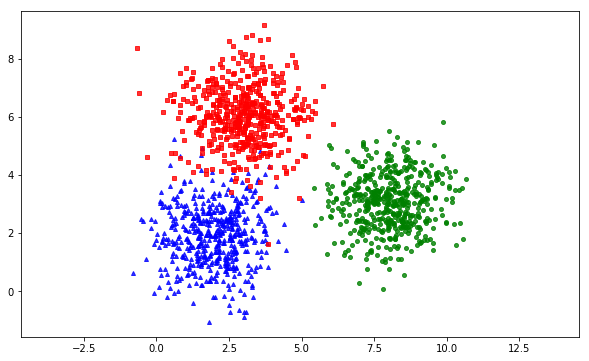

In [93]:
# Initialization Data
N = 500

# 3 means
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

[[8.02022391 3.06810092]
 [2.98927324 6.07983237]
 [1.95118823 1.89255792]]


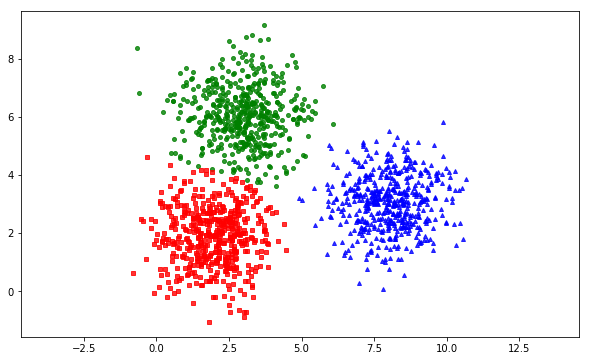

In [102]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pred_label = kmeans.predict(X)
print(kmeans.cluster_centers_)
kmeans_display(X, pred_label)

#### Deep Learning

1. **Artificial Neural Network**
    * Consists of **artificial neurons** or **processing elements** and is organized in **three interconnected layers: input, hidden that may include more than one layer, and output**.
    * The input layer contains input neurons that **send information to the hidden layer**. The hidden layer **sends data to the output layer**. Every neuron has **weighted inputs (synapses)**, an **activation function (defines the output given an input)**, and one output. Synapses are the adjustable parameters that convert a neural network to a parameterized system.
![](images\0_WI9KgVlDd_Q0BwTt_.png)
2. Deep Neural Networks
    * DNNs is ANNs with **multiple hidden layers** between the input and output layers.
    * Most popular:
        * *Convolutional Neural Networks*
            * 4 layers: Convolution layer, ReLU layer, Pooling and Fully Connected Layer
            ![](images/main-qimg-0a1588e859ac650b7edd489c8fb94fcb.png)
            * CNNs take a **fixed size input** and **generate fixed-size outputs**.
            * CNNs is a type of feed-forward artificial neural network - are variations of multilayer perceptrons which are designed to use minimal amounts of preprocessing.
            * CNNs use connectivity pattern between its neurons is inspired by the organization of the animal visual cortex, whose individual neurons are arranged in such a way that they respond to overlapping regions tiling the visual field. 
            * CNNs are ideal for images and videos processing.
            * Reference: http://cs231n.github.io/convolutional-networks/
            * **Demo:** Handwritten Digits Recognition:  http://scs.ryerson.ca/~aharley/vis/conv/
        * *Recurrent Neural Networks*
            * 4 types: One to One, One to Many, Many to One and Many to Many.
            ![](images/main-qimg-34cb8c789483ec43e2e0e0f38e422577.png)
            * RNNs can handle arbitrary input/output lengths.
            * RNNs, unlike feedforward neural networks, can use their internal memory to process arbitrary sequences of inputs.
            * RNNs use time-series information.
            * RNNs are ideal for NLP, Time Series Prediction, Machine Translation.
            * Reference: https://medium.com/mindorks/understanding-the-recurrent-neural-network-44d593f112a2
            * **Demo:** Anomaly Detection using RNN: https://github.com/chickenbestlover/RNN-Time-series-Anomaly-Detection

#### Reinforcement Learning

* Q-Learning. 
* Alpha-Go Zeros

### Part 6: Bonus: Dimensionality Reduction

Coming soon...
    
-----